In [ ]:
SVM =
SVC == SV Classifier
SVR == SV Regressor

In [2]:
### Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Import Data

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
### Splitting Data

In [4]:
X = df.drop(columns='Class')
y = df['Class']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size=.8, random_state=42)

In [7]:
from sklearn.svm import SVC

In [23]:
model_1 = SVC()

In [24]:
model_1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_base = model_1.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

In [26]:
cm_base = confusion_matrix(y_test, y_base, labels=[1, 0])

In [27]:
pd.DataFrame(data=cm_base, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,0,98
Akt 0,0,56864


In [28]:
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
df_base = pd.DataFrame(data=cm_base, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

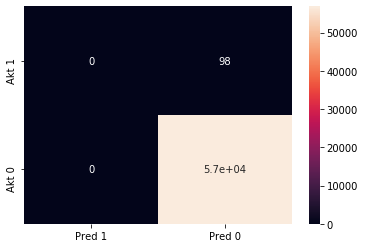

In [30]:
sns.heatmap(df_base, annot=True)
plt.show()

In [31]:
accuracy_score(y_test, y_base)

0.9982795547909132

In [33]:
recall_score(y_test, y_base)

0.0

## Optimize Model

In [35]:
### Feature Engineering

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [10]:
std = StandardScaler()

In [11]:
X_train_scaled = std.fit_transform(X_train)

In [12]:
model_2 = SVC(max_iter=200)

In [13]:
model_2.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=200, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#### Data yg akan di Predict harus melalui step yg sama dengan data FIT

In [17]:
X_test_scaled = std.fit_transform(X_test)

In [18]:
y_scale = model_2.predict(X_test_scaled)

In [19]:
cm_scale = confusion_matrix(y_test, y_scale, labels=[1, 0])

In [20]:
pd.DataFrame(data=cm_scale, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,76,22
Akt 0,5,56859


In [22]:
recall_score(y_test, y_scale)

0.7755102040816326

In [32]:
print(classification_report(y_test, y_scale))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [33]:
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
rbs = RobustScaler()

In [35]:
X_train_rbs = rbs.fit_transform(X_train)
X_test_rbs = rbs.fit_transform(X_test)

In [37]:
model_3 = SVC(max_iter = 200)

In [38]:
model_3.fit(X_train_rbs, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=200, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_rbs = model_3.predict(X_test_rbs)

In [40]:
cm_rbs = confusion_matrix(y_test, y_rbs, labels=[1, 0])

In [41]:
pd.DataFrame(data=cm_rbs, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,74,24
Akt 0,5,56859


In [42]:
print(classification_report(y_test, y_rbs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
### Hyper Parameter Tuning

In [44]:
tune_1 = SVC(max_iter = 400)

In [45]:
param_svm = {
    "C" : [1, 0.001, 0.01, 0.1, 10, 100, 1000],
    "kernel" : ['rbf', 'linear'],
    "gamma" : [1, 0.001, 0.01, 0.1, 10, 100, 1000]
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
model_tuned = GridSearchCV(estimator=tune_1, param_grid=param_svm, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

In [48]:
### Fit Data Train

In [49]:
model_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed: 12.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=400,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [58]:
model_tuned.best_score_

0.3529570514303339

In [52]:
model_tuned_1 = model_tuned.best_estimator_

In [53]:
y_tune_1 = model_tuned_1.predict(X_test)

In [54]:
cm_tune = confusion_matrix(y_test, y_tune_1, labels=[1, 0])

In [55]:
pd.DataFrame(data=cm_tune, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,40,58
Akt 0,13445,43419


In [56]:
print(classification_report(y_test, y_tune_1))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     56864
           1       0.00      0.41      0.01        98

    accuracy                           0.76     56962
   macro avg       0.50      0.59      0.44     56962
weighted avg       1.00      0.76      0.86     56962



In [57]:
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
tuned_2 = GridSearchCV(estimator=tune_1, param_grid=param_svm, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

In [61]:
tuned_2.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed: 10.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=400,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [62]:
model_tuned_2 = tuned_2.best_estimator_

In [66]:
model_tuned_2.score(X_train_scaled, y_train)

0.9993943250894248

In [64]:
model_tuned_2.score(X_test, y_test)

0.9982795547909132

In [67]:
y_tuned_2 = model_tuned_2.predict(X_test_scaled)

In [69]:
cm_tune_2 = confusion_matrix(y_test, y_tuned_2, labels=[1, 0])

In [70]:
pd.DataFrame(data=cm_tune_2, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,80,18
Akt 0,23,56841


In [71]:
print(classification_report(y_test, y_tuned_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [72]:
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

